In [272]:
import pandas as pd
# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from plotnine import *

import numpy as np

In [6]:
df_wina = pd.read_csv('wina.csv')
X = df_wina[df_wina.columns[:-1]]
y = df_wina[df_wina.columns[-1]]

In [4]:
df_wina

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [9]:
sc_Stand = StandardScaler()
X = sc_Stand.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [14]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [16]:
print("Wszystkie zmienne:", gnb.score(X_train, y_train))

Wszystkie zmienne: 0.967741935483871


In [17]:
y_pred = gnb.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  0  0]
 [ 0 23  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [22]:
pca = PCA().fit(X)

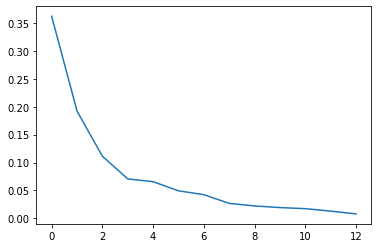

In [26]:
plt.plot(pca.explained_variance_ratio_)

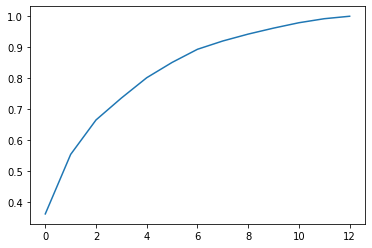

In [190]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Patrząc na wykresy, widzimy ostatni wyraźny spadek po trzecim głównym elemencie. Niestety skumulowana wariancja przekracza prawie 90% dopiero przy szóstym elemencie. Tak więc na podstawie wykresu osypiska w dalszym etapie będę badać dwa przypadki, dla trzech oraz szesciu głównych elementów. Trzy pierwsze składowe wyjaśniają w 66% wystepującą wariancję w zbiorze danych, a sześć pierwszych głównych składowych prawie 90%. 

In [192]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [193]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [196]:
licz_pc = 2z
ladunki = pca.components_[:licz_pc].T
skladowe = ["PC"+str(i) for i in range(1, licz_pc+1)]
ladunki_df = pd.DataFrame(ladunki, columns = skladowe,
                        index=df_wina.columns[:-1])
ladunki_df

,PC1,PC2,PC3,PC4,PC5,PC6
x1,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539
x2,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814
x3,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475
x4,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825
x5,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144
x6,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122
x7,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920
x8,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594
x9,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795
x10,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644


Pierwsze trzy główne składowe

In [267]:
X_PCA = pca.transform(X)
X_PCA2 = X_PCA[:,:3]

In [268]:
X_PCA2_train, X_PCA2_test, y_PCA2_train, y_PCA2_test = train_test_split(X_PCA2, y, test_size=0.30)

In [269]:
gnb2 = GaussianNB()
gnb2.fit(X_PCA2_train, y_PCA2_train)

GaussianNB()

In [270]:
print("Trzy składowe:", gnb2.score(X_PCA2_train, y_PCA2_train))

Trzy składowe: 0.9758064516129032


In [271]:
y_PCA2_pred = gnb2.predict(X_PCA2_test)

In [237]:
print(confusion_matrix(y_PCA2_test, y_PCA2_pred))
print(classification_report(y_PCA2_test, y_PCA2_pred))

[[18  3  0]
 [ 0 20  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

           1       1.00      0.86      0.92        21
           2       0.87      0.95      0.91        21
           3       0.92      1.00      0.96        12

    accuracy                           0.93        54
   macro avg       0.93      0.94      0.93        54
weighted avg       0.93      0.93      0.93        54



Pierwsze sześć głównych składowych

In [239]:
X_PCA = pca.transform(X)
X_PCA2 = X_PCA[:,:6]

In [240]:
X_PCA2_train, X_PCA2_test, y_PCA2_train, y_PCA2_test = train_test_split(X_PCA2, y, test_size=0.30)

In [241]:
gnb2 = GaussianNB()
gnb2.fit(X_PCA2_train, y_PCA2_train)

GaussianNB()

In [247]:
print("Sześć składowych:", gnb2.score(X_PCA2_train, y_PCA2_train))

Sześć składowych: 0.9838709677419355


In [243]:
y_PCA2_pred = gnb2.predict(X_PCA2_test)

In [244]:
print(confusion_matrix(y_PCA2_test, y_PCA2_pred))
print(classification_report(y_PCA2_test, y_PCA2_pred))

[[13  1  0]
 [ 0 27  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.96      1.00      0.98        27
           3       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Na podstawie wyników Naiwnego Bayes'a można stwierdzić, że trzy główne składowe są wystarczające, ponieważ wyniki w porównaniu ze sześcioma głównymi składowymi są bardzo podobne i tylko niewiele lepszy wynik znajduje się w przypadku sześciu składowych. Więc na podstawie tych wyników zdecydowałbym się wybrać trzy główne składowe, by reprezentowały ten zbiór danych.